### Importing necessary libraries 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Reading in data 

In [8]:
marketing_data = pd.read_csv('../Dataset/Marketing Raw Data.csv')
print(marketing_data.shape)
marketing_data.head(5)

(182, 11)


,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,9/11/2020,46,34,11,11,2020,Monday,707,465,651.375,No Promo
1,10/11/2020,46,34,11,11,2020,Tuesday,1455,10386,1298.250,Promotion Red
2,11/11/2020,46,34,11,11,2020,Wednesday,1520,12475,1559.375,Promotion Blue
3,12/11/2020,46,34,11,11,2020,Thursday,1726,11712,1801.750,No Promo
4,13/11/2020,46,34,11,11,2020,Friday,2134,10000,2614.500,No Promo


### Line Graph

> Investigating the trend between date and revenue

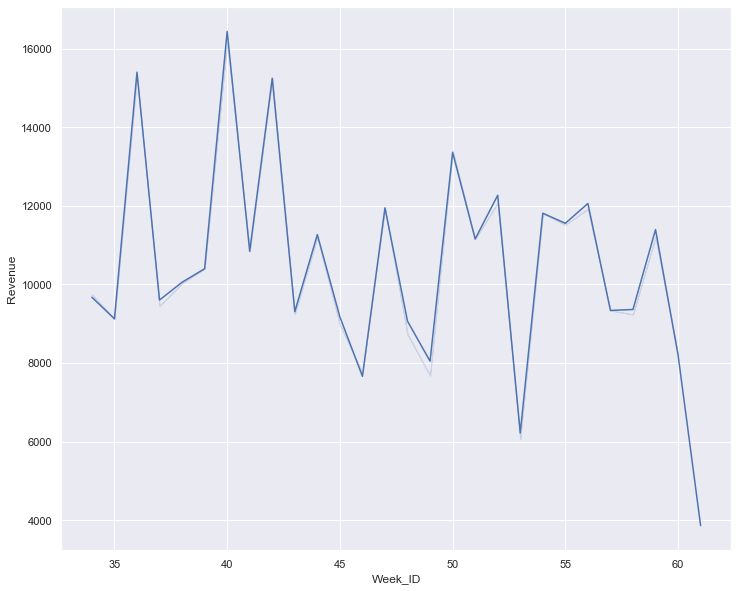

In [50]:
sns.set(rc ={'figure.figsize':(12,10)})
ax = sns.lineplot(x='Week_ID', y = 'Revenue', ci = False,data = marketing_data)
plt.savefig("correlation_weekID_Rev.png") # Save that figure

> Examining the performance of revenue by promotion, categorize by Month

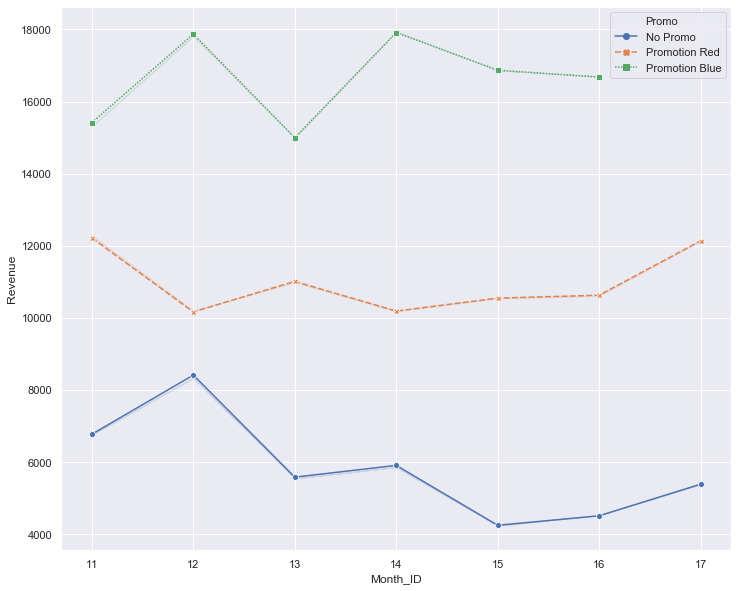

In [48]:
# Creating my line graph as well as adding styling 
sns.set(rc ={'figure.figsize':(12,10)})
ax = sns.lineplot(x='Month_ID', y = 'Revenue',hue = 'Promo',
                  style ='Promo',ci = False,
                  markers = True,data = marketing_data)
plt.savefig("Promo_revBy_MonthID.png") # Save that figure

From the graph above we can make the observation that, based on the Month_ID promotion blue had the highest revenue with a steady increase. We also see that over a period of a few months the revenue of no promotion has made a steep decline, but is slowly increasing. 

> next I'll examining the performance of revenue by promotion, categorize by Day_Name

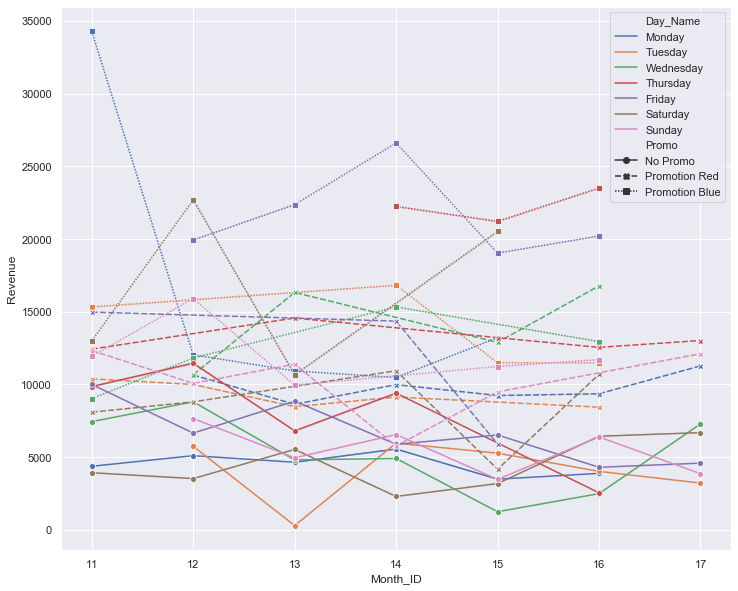

In [47]:
# Creating my line graph as well as adding styling 
sns.set(rc ={'figure.figsize':(12,10)})
ax = sns.lineplot(x='Month_ID', y = 'Revenue',hue = 'Day_Name',
                  style ='Promo',ci = False,
                  markers = True,data = marketing_data)
plt.savefig("DailyPromo_revBy_MonthID.png") # Save that figure

From the graph above we can make the observation that, The Monday during the month of november with promotion blue may be an outlier because of the steep drop in revenue the following month. We can also see the most consistent days of the week are(Thursday and Friday) with promotion blue.Promotion blue on Saturdays are also interesting with a steady increase then drop repeatedly after each month. 

### Bar Plot

By default the barplot gives us the mean and not the sum of the month_ID. To have a better understanding of the data, I created a data frame of the mean value for each month and displayed the data

           Revenue
Year              
2020  11496.641509
2021  10205.643411


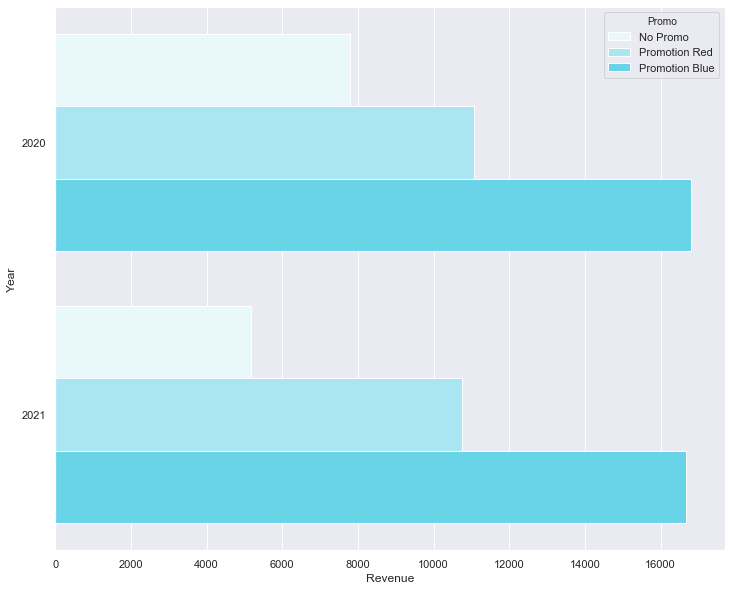

In [45]:
mean_data = marketing_data[['Revenue','Year']].groupby('Year').agg({'Revenue':'mean'})
print(mean_data)
ax = sns.barplot(x = 'Revenue',y='Year',orient = 'h',hue='Promo',
                 ci = False,color = '#54e3fc',data = marketing_data)
plt.savefig("Yearly_Revenue_BarPlot.png") # Save that figure

In the Bar plot above we are observing the average revenue by year. From the data we can make pretty straight forward observations. first in the year we see promotion blue having the most revenue compared to the other promotions. In addition in the following year we see slight increases to all promotions instead of no promotions which had almost a 50% decrease

### Histogram

Investigating distribution of revenue

In [19]:
# List of revenue
rev_list = marketing_data['Revenue'].values
rev_list

array([  465, 10386, 12475, 11712, 10000, 12996, 11929,  5359, 12016,
        7441,  8000, 15188,  3926, 14012, 34278, 18650,  5574, 12425,
       14760,  8091, 10647,  7290,  4587, 12154,  8400, 20607,  3525,
       10075,  9612,  6908, 12740, 15288,  6654,  9097,  8802, 11679,
       11952,  4873,  8516, 18161,  8800,  7655, 12038, 10245, 11817,
       15991, 21031, 36283, 23014,  5100,  7793,  9180,  9125, 21428,
        9062,  9952,  4714,  9418, 16325,  6254,  7215, 11249, 12129,
        4581,  8702,  5937, 14568, 21245, 11699,  9602,  8633,  7287,
        4403,  3021, 24417,  6837, 12445, 10925,   292,  4085, 11156,
       10485,  4225,  4953, 10479, 12783, 18678, 13281, 14356,  9095,
        7264,  5263, 20860, 13602,  5519,  8741,  2184,  5772,  9987,
        5966,  4910, 24247,  3025,  2409,  5171,  5847,  9135, 13719,
       20237, 26608, 12789,  7222, 13212,  4376,  8223, 16727, 15474,
       12850,  3470,  3589,  5187, 13201, 25704,  6523, 28196,  7878,
        3378,  6047,

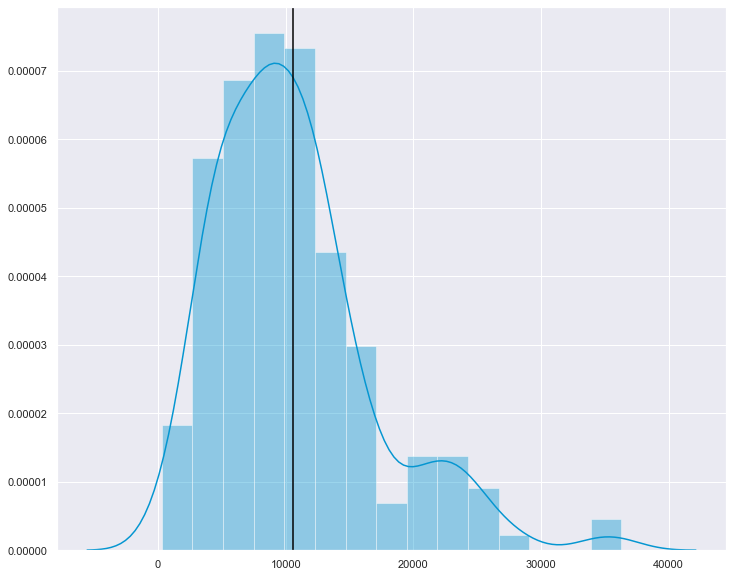

In [44]:
# Creating Histogram, with calculated mean
mean = marketing_data['Revenue'].mean()

# displaying histogram
sns.distplot(rev_list,color ='#0596d1')
plt.axvline(mean,0,1,color='black')
plt.savefig("Revenue_distribution_Histogram.png") # Save that figure

From the graph above we can see that the graph is a bit imbalanced. The data is skewed to the right,as we see the revenue start to decrease.

### Box and Whisker

Median revenue: 9452.0


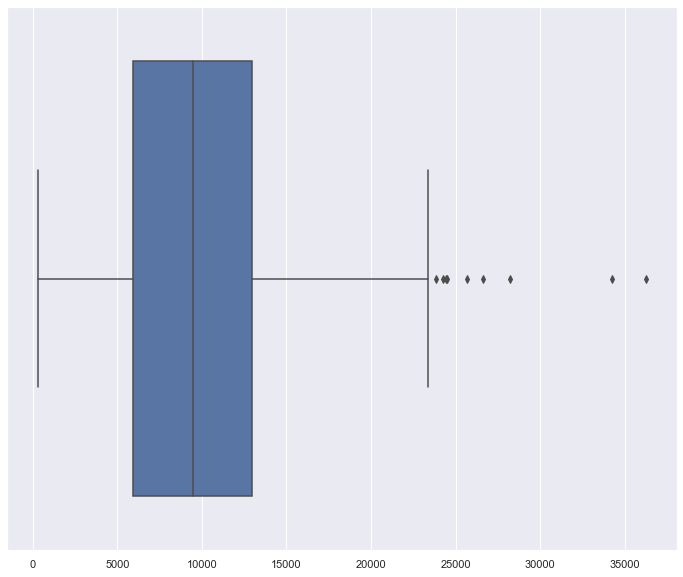

In [43]:
# using the same revenue list created for the histogram above 
sns.set(rc ={'figure.figsize':(12,10)})
# calculating the median
median = marketing_data['Revenue'].median() 
print('Median revenue:',median)
sns.boxplot(rev_list)
plt.savefig("Revenue_distribution_BoxPlot.png") # Save that figure

Notes:<br>
The line signifies the median<br>
The box in the middle show the beginning of Q1 (25th percentile) and the end of the Q3 (75th percentile)<br>
The whiskers (left - right) show the minimum quartile and maximum quartile<br>
The dots on the right are "outliers"<br>

### Investigating the distribution of revenue by day 

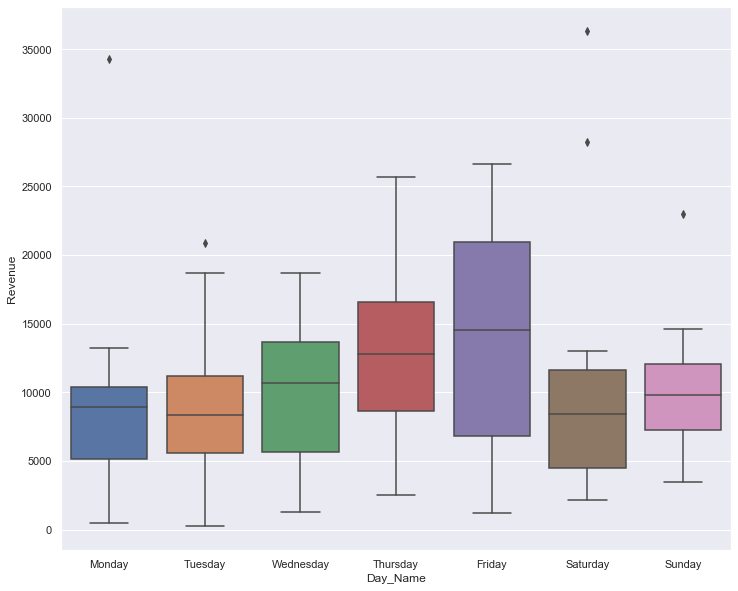

In [42]:
plt.figure() # Push new figure on stack
ax = sns.boxplot(x ='Day_Name' ,y ='Revenue' ,data = marketing_data)
plt.savefig("Revenue_distribution_Daysofweek_BoxPlot.png") # Save that figure

This shows us the revenue data points for each day of the week,as well as their median values. We also see the outliers for Monday,Tuesday,Saturday, and Sunday.<br>
After careful observations we see that the highest median day is actually Friday, and the lowest is the combination of Tuesday, and Saturday.